From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the important libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
#Loading the dataset:
iris_data = pd.read_csv ("Iris.csv")
iris_data.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
X= iris_data.iloc [:, [0,1,2,3,4]].values
print(X)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

In [4]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Chuks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plotting the results onto a line graph so as to see the elbow. Where the elbows lies, show the optimum number of clusters.

Text(0, 0.5, 'WCSS')

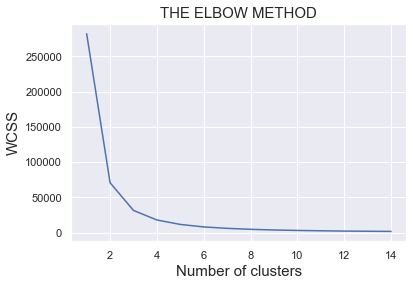

In [13]:
plt.plot (range (1, 15), wcss)
plt.title('THE ELBOW METHOD', size = 15)
plt.xlabel ('Number of clusters', size = 15)
plt.ylabel ('WCSS', size = 15)

From the graph, it is observed that the optimum number of clusters is "3".

Applying kmeans to the dataset/creating the Kmeans classifier

In [16]:
kmeans = KMeans (n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

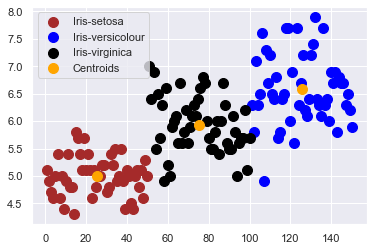

In [40]:
# Visualizing the clusters
plt.scatter (X[y_kmeans == 0,0], X[y_kmeans == 0, 1],
            s= 100, c = 'brown', label = 'Iris-setosa')
plt.scatter (X[y_kmeans == 1,0], X[y_kmeans == 1, 1],
            s= 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter (X[y_kmeans == 2,0], X[y_kmeans == 2, 1],
            s= 100, c = 'black', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter (kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100, c = "orange", label = 'Centroids')
plt.legend()
